<a href="https://colab.research.google.com/github/grommitt/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
### YOUR CODE STARTS HERE
from scipy import stats
import pandas as pd
import numpy as np

#Load and clean the data (or determine the best method to drop observations when running tests)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                header=None)
df.columns = ['party', 
             'issue_1',
             'issue_2',
             'issue_3',
             'issue_4',
             'issue_5',
             'issue_6',
             'issue_7',
             'issue_8',
             'issue_9',
             'issue_10',
             'issue_11',
             'issue_12',
             'issue_13',
             'issue_14',
             'issue_15',
             'issue_16',
             ]

In [0]:

df.replace('?', 'n', inplace=True)

In [86]:
pd.options.display.max_columns = 500
df.head()

,party,issue_1,issue_2,issue_3,issue_4,issue_5,issue_6,issue_7,issue_8,issue_9,issue_10,issue_11,issue_12,issue_13,issue_14,issue_15,issue_16
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n
2,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,n,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


In [0]:
# Using hypothesis testing, find an issue that democrats support more than 
# republicans with p < 0.01

import seaborn as sns
from matplotlib import style
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import random


In [88]:
df.head()
df.loc[0]

party       republican
issue_1              n
issue_2              y
issue_3              n
issue_4              y
issue_5              y
issue_6              y
issue_7              n
issue_8              n
issue_9              n
issue_10             y
issue_11             n
issue_12             y
issue_13             y
issue_14             y
issue_15             n
issue_16             y
Name: 0, dtype: object

In [0]:
df['republicans'] = True
df['democrats'] = True

In [0]:
df['republicans'] = df[df['party'] == 'republican']
df['democrats'] = df[df['party'] == 'democrat']

In [81]:
df['republicans']

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
405    True
406    True
407    True
408    True
409    True
410    True
411    True
412    True
413    True
414    True
415    True
416    True
417    True
418    True
419    True
420    True
421    True
422    True
423    True
424    True
425    True
426    True
427    True
428    True
429    True
430    True
431    True
432    True
433    True
434    True
Name: republicans, Length: 435, dtype: bool

In [91]:
df.head()
df.replace(['n', 'y'], [0, 1], inplace=True)
df.head()
df.dtypes

party          object
issue_1         int64
issue_2         int64
issue_3         int64
issue_4         int64
issue_5         int64
issue_6         int64
issue_7         int64
issue_8         int64
issue_9         int64
issue_10        int64
issue_11        int64
issue_12        int64
issue_13        int64
issue_14        int64
issue_15        int64
issue_16        int64
republicans    object
democrats      object
dtype: object

In [0]:
republicans = df[df['party'] == 'republican']
democrats = df[df['party'] == 'democrat']

In [93]:
#republican = df.loc[df['party'] == 'republican']
#democrat = df.loc[df['party'] == 'democrat']
republicans.head()

,party,issue_1,issue_2,issue_3,issue_4,issue_5,issue_6,issue_7,issue_8,issue_9,issue_10,issue_11,issue_12,issue_13,issue_14,issue_15,issue_16,republicans,democrats
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,republican,NaN
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,republican,NaN
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,republican,NaN
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,republican,NaN
10,republican,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,republican,NaN


In [94]:
republicans.describe()

,issue_1,issue_2,issue_3,issue_4,issue_5,issue_6,issue_7,issue_8,issue_9,issue_10,issue_11,issue_12,issue_13,issue_14,issue_15,issue_16
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.184524,0.446429,0.130952,0.970238,0.934524,0.886905,0.232143,0.142857,0.113095,0.547619,0.125000,0.803571,0.809524,0.940476,0.083333,0.571429
std,0.389070,0.498608,0.338357,0.170438,0.248104,0.317656,0.423462,0.350973,0.317656,0.499215,0.331708,0.398484,0.393851,0.237310,0.277212,0.496351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
mean_issues = pd.DataFrame(
    {'Republicans': republicans.mean(),
     'Democrats': democrats.mean()
    })
mean_issues

,Republicans,Democrats
issue_1,0.184524,0.584270
issue_2,0.446429,0.449438
issue_3,0.130952,0.865169
issue_4,0.970238,0.052434
issue_5,0.934524,0.205993
issue_6,0.886905,0.460674
issue_7,0.232143,0.749064
issue_8,0.142857,0.816479
issue_9,0.113095,0.704120
issue_10,0.547619,0.464419


In [96]:
for sample in (republicans, democrats):
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    print("---"*10)

Mean: issue_1     0.184524
issue_2     0.446429
issue_3     0.130952
issue_4     0.970238
issue_5     0.934524
issue_6     0.886905
issue_7     0.232143
issue_8     0.142857
issue_9     0.113095
issue_10    0.547619
issue_11    0.125000
issue_12    0.803571
issue_13    0.809524
issue_14    0.940476
issue_15    0.083333
issue_16    0.571429
dtype: float64
Standard Deviation: issue_1     0.389070
issue_2     0.498608
issue_3     0.338357
issue_4     0.170438
issue_5     0.248104
issue_6     0.317656
issue_7     0.423462
issue_8     0.350973
issue_9     0.317656
issue_10    0.499215
issue_11    0.331708
issue_12    0.398484
issue_13    0.393851
issue_14    0.237310
issue_15    0.277212
issue_16    0.496351
dtype: float64
Variance: issue_1     0.151376
issue_2     0.248610
issue_3     0.114485
issue_4     0.029049
issue_5     0.061555
issue_6     0.100905
issue_7     0.179320
issue_8     0.123182
issue_9     0.100905
issue_10    0.249216
issue_11    0.110030
issue_12    0.158790
issue_13  

ValueError: ignored

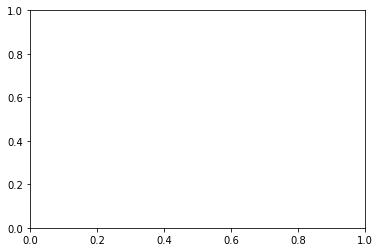

In [100]:
sns.kdeplot(df[df['issue_1'] ==0], color='black')